In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.head()
df['MedHouseVal']=data.target
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:

X=df[['MedInc','AveRooms','HouseAge','AveOccup','Latitude','Longitude','AveBedrms']]
y=df['MedHouseVal']


In [5]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(x_test)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
model


LinearRegression()

In [6]:
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("r2_score",r2_score(y_test,y_pred))

mean_squared_error 0.555953134734067
r2_score 0.5757407466176081


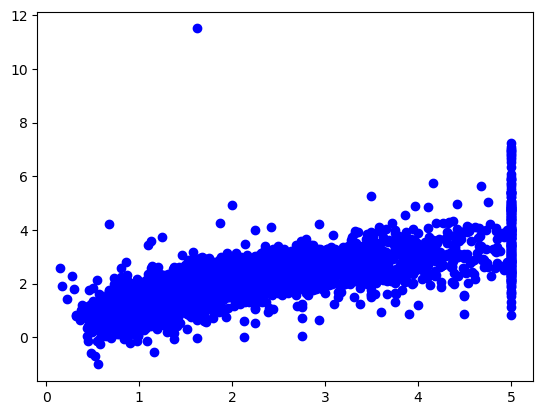

<Axes: xlabel='MedHouseVal', ylabel='Count'>

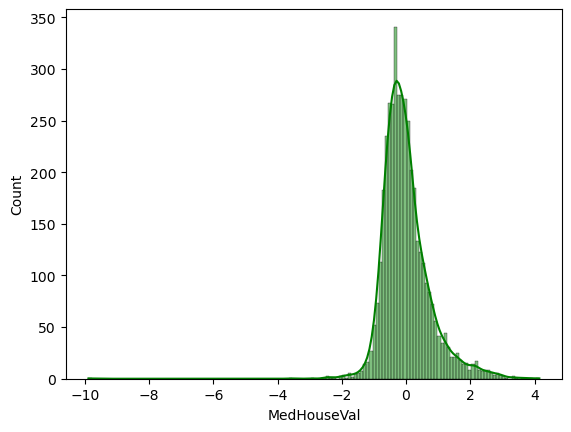

In [7]:
plt.scatter(y_test, y_pred,c='blue')
plt.show()
sns.histplot(y_test-y_pred,kde=True,color='green')

In [8]:
### Ridge Regresion
alphas=[0.1,1.0,10.0,100.0]
model_ridge=RidgeCV(alphas=alphas)
model_ridge.fit(X_train,y_train)
y_pred_ridge=model_ridge.predict(x_test)
print("Best alpha:",model_ridge.alpha_)
print("Ridge mean_squared_error",mean_squared_error(y_test,y_pred_ridge))
print("Ridge r2_score",r2_score(y_test,y_pred_ridge))


Best alpha: 1.0
Ridge mean_squared_error 0.5559156992618923
Ridge r2_score 0.5757693143951466


In [9]:
##Lasso Regression
alphas=[0.001,0.01,0.1,1.0]
model_lasso=LassoCV(alphas=alphas)
model_lasso.fit(X_train,y_train)
y_pred_lasso=model_lasso.predict(x_test)
print("Best alpha:",model_lasso.alpha_)
print("Lasso mean_squared_error",mean_squared_error(y_test,y_pred_lasso))
print("Lasso r2_score",r2_score(y_test,y_pred_lasso))


Best alpha: 0.001
Lasso mean_squared_error 0.5545227370225021
Lasso r2_score 0.5768323124839265
